In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn
import matplotlib.pyplot as plt
from scipy.special import gamma
import numpy as np
seaborn.set_context("talk", font_scale=1.5)
seaborn.set_style("whitegrid")
%matplotlib inline

# Define standard numpy ops.
det = np.linalg.det
inv = np.linalg.inv

In [3]:
# MVN pdf function. 
def gaussian_pdf(x, mu, sigma):
    "Two parameters mu and sigma"
    norm = (det(2 * np.pi * sigma)** (-1/2.))
    r = (x - mu)
    return norm * np.exp(-(1/2.) * (r.dot(inv(sigma)) * r).sum(1)) 

In [4]:
%matplotlib inline
def plot(mean=0, variance=1):
    x = np.linspace(-10, 10, 100)
    y = gaussian_pdf(x.reshape(100, 1), np.array([mean]), np.array([[variance]]))
    plt.plot(x, y)
    plt.title("Gaussian(%2.2f, %2.2f)"%(mean, variance))
    plt.xlim([-10, 10])
    plt.ylim([0, 1.0])
    plt.xlabel("mean")
    plt.ylabel("var")
interactive(plot, mean=(-5.0, 5.0), variance=(0.0, 5.0))


A Jupyter Widget

<IPython.core.display.Javascript object>


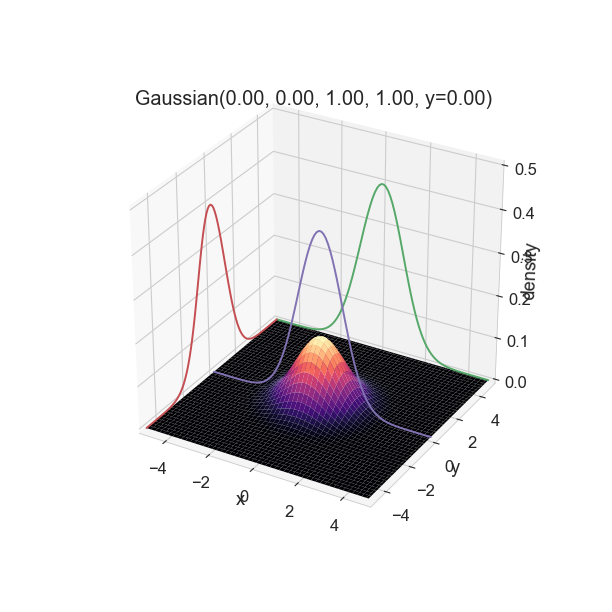

A Jupyter Widget

In [6]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

def plot(mean_x=0, mean_y=0, var_x=1, var_y=1, covar_xy=0, y_check=0):
    ax.clear()
    y_spot = int((y_check + 5) * 10.0)
    print(y_spot)
    x_o = np.linspace(-5, 5, 100)
    y_o = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x_o, y_o)
    Z = gaussian_pdf(np.array([x.ravel(), y.ravel()]).T,
                     np.array([mean_x, mean_y]), np.array([[var_x, covar_xy], [covar_xy, var_y]]))
    Z = Z.reshape(x.shape)
    f = ax.plot_surface(x, y, Z, cmap="magma")
    ax.set_title("Gaussian(%2.2f, %2.2f, %2.2f, %2.2f, y=%2.2f)"%(mean_x, mean_y, var_x, var_y, y_check))
#     ax.plot(x[0], gaussian_pdf(np.linspace(-5, 5, 100).reshape(100,1), np.array([mean_x]), np.array([[var_x]])), 
#             zs =0, zdir="y")
    p_x = Z.mean(0) * (y_o[-1] - y_o[0])
    p_y = Z.mean(1) * (x_o[-1] - x_o[0])
    ax.plot(x[0], p_x,  zs=5, zdir='y')
    ax.plot(y[:, 0], p_y,  zs=-5, zdir='x')

    p_x_y = Z[:, y_spot] / p_y[y_spot]
    ax.plot(x[0], p_x_y, zs=y_check, zdir='y')

    ax.set_zlim([0, 0.5])
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("density")
#plot()
interactive(plot, mean_x=(-5.0, 5.0), mean_y=(-5.0, 5.0), var_x=(0.0, 5.0), 
            var_y=(0, 5.0), covar_xy=(-1., 1.0), y_check=(-5.0, 5.0))

<IPython.core.display.Javascript object>


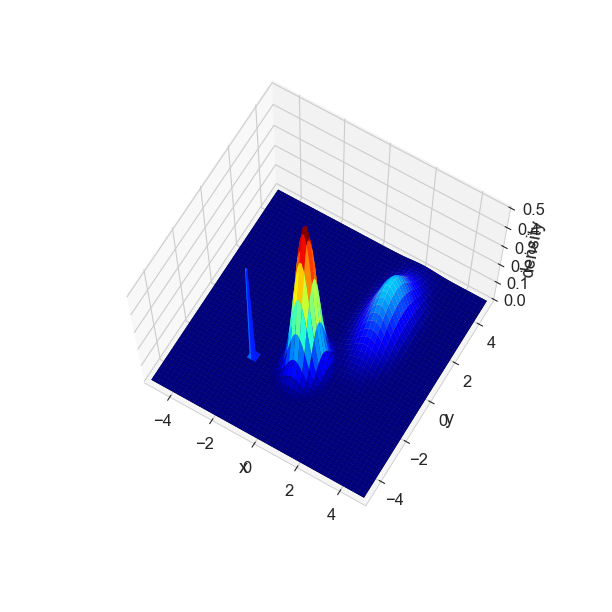

A Jupyter Widget

In [7]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

def plot(mean_x=2, mean_y=2, var_x=0.5, var_y=0.5, covar_xy=0, N = 0, location_x=-2, location_y=-2):
    ax.clear()
    sigma = np.array([[1, 0], [0, 1]])
    x_o = np.linspace(-5, 5, 100)
    y_o = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x_o, y_o)

    
    mean_0 = np.array([mean_x, mean_y])
    sigma_0 = np.array([[var_x, covar_xy], [covar_xy, var_y]])
    Z = gaussian_pdf(np.array([x.ravel(), y.ravel()]).T,
                     mean_0, sigma_0)
    Z = Z.reshape(x.shape)

    f = ax.plot_surface(x, y, Z, cmap="magma")

    x_obs = np.array([location_x, location_y])
    sigma_N = inv(inv(sigma_0) + N * sigma)
    mean_N = sigma_N.dot(inv(sigma).dot(N * x_obs) + inv(sigma_0).dot(mean_0))

    print(mean_N, mean_0)
    Z2 = gaussian_pdf(np.array([x.ravel(), y.ravel()]).T,
                     mean_N, sigma_N)
    Z2 = Z2.reshape(x.shape)

    Z3 = np.minimum(gaussian_pdf(np.array([x.ravel(), y.ravel()]).T,
                     x_obs, sigma /1000.0), 0.5)
    Z3 = Z3.reshape(x.shape)
    f = ax.plot_surface(x, y, np.maximum(np.maximum(Z, Z2), Z3), cmap="jet")

#     ax.set_title("Gaussian(%2.2f, %2.2f, %2.2f, %2.2f, y=%2.2f)"%(mean_x, mean_y, var_x, var_y, y_check))
# #     ax.plot(x[0], gaussian_pdf(np.linspace(-5, 5, 100).reshape(100,1), np.array([mean_x]), np.array([[var_x]])), 
# #             zs =0, zdir="y")
#     p_x = Z.mean(0) * (y_o[-1] - y_o[0])
#     p_y = Z.mean(1) * (x_o[-1] - x_o[0])
#     ax.plot(x[0], p_x,  zs=5, zdir='y')
#     ax.plot(y[:, 0], p_y,  zs=-5, zdir='x')

#     p_x_y = Z[:, y_spot] / p_y[y_spot]
#     ax.plot(x[0], p_x_y, zs=y_check, zdir='y')

    ax.set_zlim([0, 0.5])
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("density")
#plot()
interactive(plot, mean_x=(-5.0, 5.0), mean_y=(-5.0, 5.0), var_x=(0.0, 5.0), 
            var_y=(0, 5.0), covar_xy=(-1., 1.0), y_check=(-5.0, 5.0), 
            location_x=(-5.0, 5.0),  location_y=(-5.0, 5.0), N=(0, 100))